In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

import pymc3 as pm

%config InlineBackend.figure_format = "retina"
%matplotlib inline

You are running the v4 development version of PyMC3 which currently still lacks key features. You probably want to use the stable v3 instead which you can either install via conda or find on the v3 GitHub branch: https://github.com/pymc-devs/pymc3/tree/v3


### Dirichlet process prior in NumPy

In [2]:
N = 40 # number of samples from Dirichlet Process
K = 50 # number of mini-sticks, higher number needed for larger alpha

P0 = np.random.normal
x_plot = np.linspace(-3.2, 3.2, num=1001)

def cdf(alpha):
    betas = np.random.beta(1, alpha, size=[N, K])
    betas[:, 1:] = betas[:, 1:] * (1 - betas[:, :-1]).cumprod(axis=1)

    w = betas.copy() # weights
    m = P0(size=[N, K])

    dirac = np.less.outer(m, x_plot).astype(int)
    return (w[..., np.newaxis]*dirac).sum(axis=1)

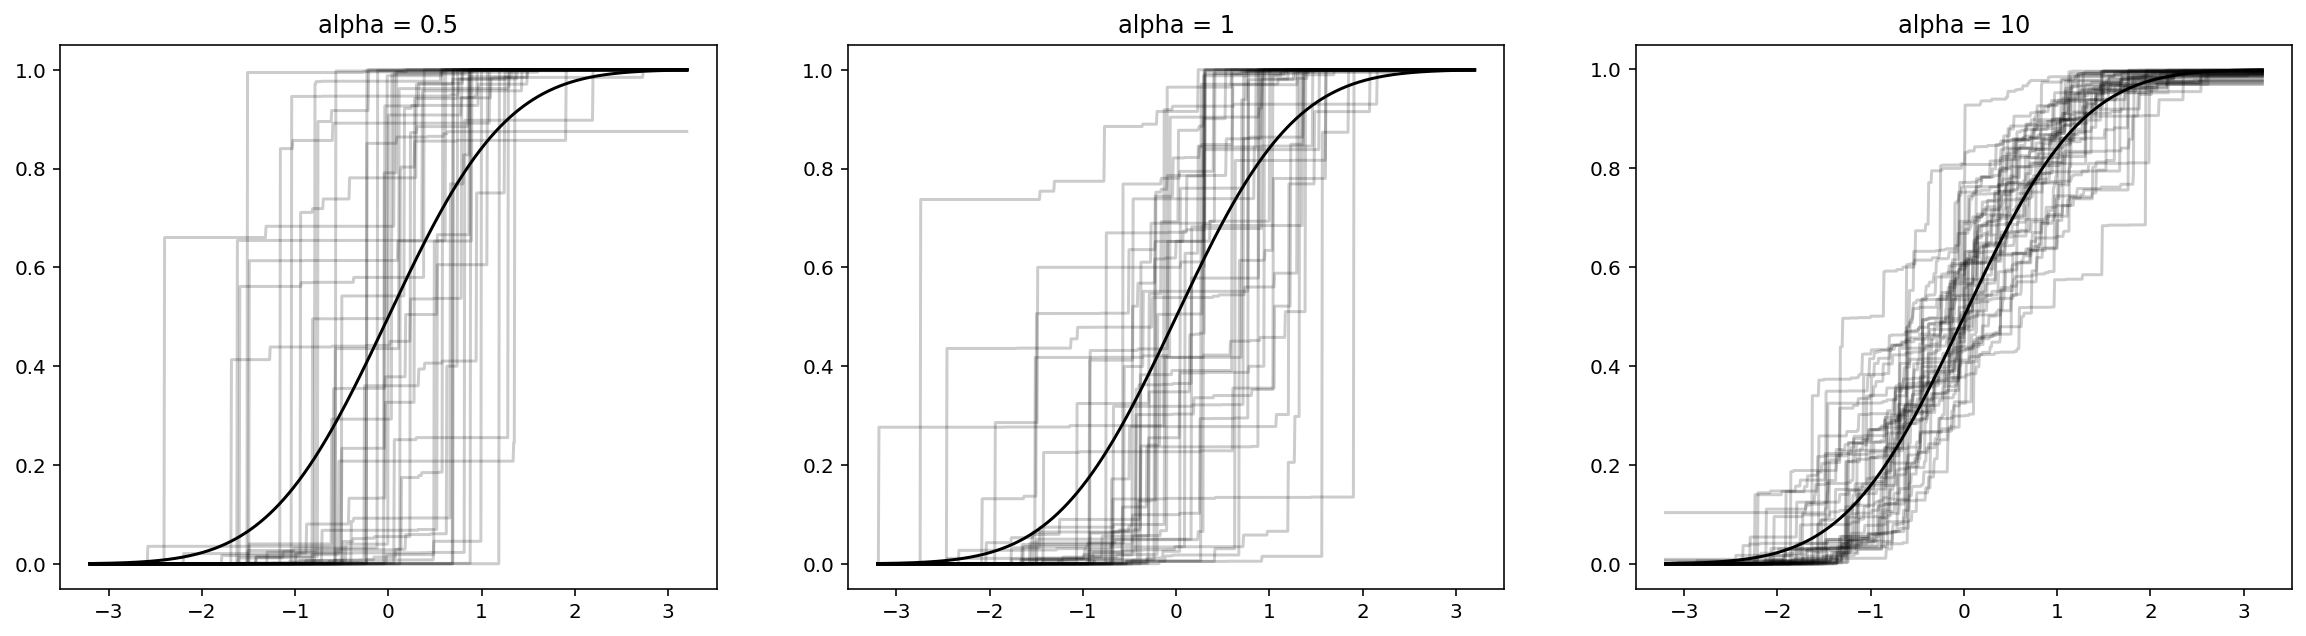

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

cdfs = {
    0.5: cdf(0.5),
    1: cdf(1),
    10: cdf(10),
}

for fig_num, (alpha, dp_sample) in enumerate(cdfs.items()):
    for i in range(N):
        ax[fig_num].plot(x_plot, dp_sample[i], c="k", alpha=0.2)

    ax[fig_num].plot(x_plot, st.norm.cdf(x_plot), c="k")
    ax[fig_num].set_title(f"alpha = {alpha}")